In [30]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import os
import matplotlib.font_manager as fm
import numpy as np


In [31]:
# Charts Functions
def dbggs_chart(df):

    # Convert DateTime column to datetime format
    df["DateTime"] = pd.to_datetime(df["DateTime"])

    # Set bar width
    bar_width = 0.4

    # Create positions for the bars
    x = np.arange(len(df))

    # Plot DBGG bars
    plt.figure(figsize=(8.27, 3.69))  # A4 size for print
    bars_dbgg = plt.bar(x, df["DBGG"], width=bar_width, label="DBGG", color="orange")

    # Plot DLSP bars with overlap
    bars_dlsp = plt.bar(x, df["DLSP"], width=bar_width / 2, label="DLSP", color="skyblue", alpha=0.7)

    # Customize the date format to "Mar 24", "Apr 24"
    plt.xticks(x, df["DateTime"].dt.strftime('%b %y'), rotation=0)

    # Set y-axis limits to start at 40
    plt.ylim(45, max(df["DBGG"].max(), df["DLSP"].max()) + 20)  # Set a max value with a buffer of 10

    # Add labels and title with Montserrat font
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("(%, GDP)", fontsize=12)
    plt.title("DLSP and DBGG", fontsize=16)
    plt.legend()

    # Add values inside colored boxes
    for bars, color in zip([bars_dbgg, bars_dlsp], ["orange", "skyblue"]):
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}', ha='center', va='bottom', fontsize=10,
                     bbox=dict(facecolor=color, edgecolor='none', boxstyle='round,pad=0.3'))

    # Layout adjustment
    plt.tight_layout()
    
    # Save the plot as an image (PNG format)
    export_path = "../report/images"
    export_file_name = os.path.join(export_path, 'dbgg_chart.png')  # Combine folder path with file name
    plt.savefig(export_file_name, bbox_inches='tight')

    # Show the plot
    plt.show()

# Clean DBGG
def cutoff_df(dataset, date_col):

    # Convert the specified date column to datetime if it's not already
    dataset[date_col] = pd.to_datetime(dataset[date_col], errors='coerce')

    # Calculate the cutoff date (14 months ago from today)
    today = datetime.today()
    cutoff_date = today - pd.DateOffset(months=14)

    # Filter the DataFrame for rows within the last 14 months
    filtered_df = dataset[dataset[date_col] >= cutoff_date]

    return filtered_df

# Clean Resultados Primário
def add_data(resultados_df):
    # Create the dataframe
    more_data = {
        'Year': [2023,2024, 2025, 2026, 2027],
        'primary_fiscal_target_2023': [-0.5, 0, 0.5, 1, None],
        'new_primary_fiscal_target': [None, 0, 0, 0.25, 0.5],  # Placeholder for 1W_exp values
        'market_expectations': [None, -0.6, -0.70, -0.5, -0.3]
    }

    more_data = pd.DataFrame(more_data)
    
    resultados_df.columns = ["DateTime", "nominal", "primario"]
    
    # Filter the DataFrame for rows within the last 14 months
    resultados_df =resultados_df[resultados_df["DateTime"] >= "2021-01-06"]
    
    # Create the new dataframe with the 'DateTime' column for December of each year
    more_data_df = pd.DataFrame(more_data)
    more_data_df['DateTime'] = pd.to_datetime(more_data_df['Year'].astype(str) + '-12-01', format='%Y-%m-%d')


    # Concatenate the original dataframe with the new dataframe
    resultados_df = pd.concat([resultados_df, more_data_df[['DateTime', 'primary_fiscal_target_2023', 'new_primary_fiscal_target', 'market_expectations']]], ignore_index=True)
    resultados_df['DateTime'] = pd.to_datetime(resultados_df['DateTime'], format='%Y-%m-%d')
    
    return resultados_df

def primario_chart(df):
    # Define a color palette (colorblind-friendly)
    colors = {
        'primario': '#1f77b4',  # Blue
        'nominal': '#ff7f0e',   # Orange
        'primary_fiscal_target_2023': '#2ca02c',  # Green
        'new_primary_fiscal_target': '#d62728',   # Red
        'market_expectations': '#9467bd'  # Purple
    }

    # Plot the line chart using 'primario', 'proj_now', 'proj_1wago', and 'proj_4wago'
    plt.figure(figsize=(8.27, 3.69))  # A4 size for print

    # Plot 'primario'
    plt.plot(df['DateTime'], df['primario'], label='Central Government Primary Balance', 
             color=colors['primario'], markersize=6, linestyle='-')
    plt.text(df['DateTime'].iloc[-6], df['primario'].iloc[-6], 
             f'{df["primario"].iloc[-6]:.2f}', color=colors['primario'], fontsize=10, ha='center', va='bottom')

    # Plot 'nominal'
    plt.plot(df['DateTime'], df['nominal'], label='Central Government Nominal Result', 
             color=colors['nominal'], markersize=6, linestyle='-')
    plt.text(df['DateTime'].iloc[-6], df['nominal'].iloc[-6], 
             f'{df["nominal"].iloc[-6]:.2f}', color=colors['nominal'], fontsize=10, ha='center', va='bottom')

    # Plot 'primary_fiscal_target_2023'
    plt.plot(df['DateTime'], df['primary_fiscal_target_2023'], label='Gov Target in 23 (+/- 0.25)', 
             color=colors['primary_fiscal_target_2023'], marker='s', linestyle='--', markersize=6)
    for i, txt in enumerate(df['primary_fiscal_target_2023']):
        plt.text(df['DateTime'][i], txt + 1.8, f'{txt:.2f}', color=colors['primary_fiscal_target_2023'], fontsize=10, ha='right', va='top')

    # Plot 'new_primary_fiscal_target'
    plt.plot(df['DateTime'], df['new_primary_fiscal_target'], label='Gov Target in 24 (+/- 0.25)', 
             color=colors['new_primary_fiscal_target'], marker='s', linestyle='--', markersize=6)
    for i, txt in enumerate(df['new_primary_fiscal_target']):
        plt.text(df['DateTime'][i], txt + 1.0, f'{txt:.2f}', color=colors['new_primary_fiscal_target'], fontsize=10, ha='left', va='top')

    # Plot 'market_expectations'
    plt.plot(df['DateTime'], df['market_expectations'], label='Market Expectations (FOCUS)', 
             color=colors['market_expectations'], marker='s', linestyle='--', markersize=6)
    for i, txt in enumerate(df['market_expectations']):
        plt.text(df['DateTime'][i], txt - 1.4, f'{txt:.2f}', color=colors['market_expectations'], fontsize=10, ha='left', va='bottom')

    # Add a horizontal line at y = 0
    plt.axhline(0, color='black', linestyle='--', linewidth=1)

    # Adding labels and title
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('(%, GDP)', fontsize=12)
    plt.title('Central Government Primary Balance', fontsize=14)

    # # Adding gridlines for better readability (optional)
    # plt.grid(True, linestyle='--', alpha=0.7)

    # Adding legend
    plt.legend()

    # Display the plot
    plt.xticks(rotation=0)  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout to ensure no clipping

    # Save the plot as an image (PNG format)
    export_path = "../report/images"
    export_file_name = os.path.join(export_path, 'primario.png')  # Combine folder path with file name
    plt.savefig(export_file_name, bbox_inches='tight')
    
    plt.show()

In [32]:
# Global Settings

# Path to your Montserrat font (update the path to where you have the font file)
font_path = './assets/Montserrat/static/Montserrat-Regular.ttf'
# Register the font with Matplotlib's font manager
fm.fontManager.addfont(font_path)

# Set the global font family to Montserrat
plt.rcParams['font.family'] = 'Montserrat'

# Importing Data

# Raw Path Data
raw_path = "../data/raw/"

# Get a list of all files in the folder
files = os.listdir(raw_path)

# Loop through all files in the folder
for file in files:
    try:
        # Construct the full file path
        file_path = os.path.join(raw_path, file)
        
        # Check if it is a file, is a CSV, and contains "resultados" in its name
        if os.path.isfile(file_path) and file.endswith('.csv') and 'resultados' in file:
            # Import the CSV file into a DataFrame
            resultados_df = pd.read_csv(file_path)
            print(f"Imported '{file}' successfully.")
        
        # Check if it is a file, is a CSV, and contains "resultados" in its name
        if os.path.isfile(file_path) and file.endswith('.csv') and 'dbgg' in file:
            # Import the CSV file into a DataFrame
            dbggs_df = pd.read_csv(file_path)
            print(f"Imported '{file}' successfully.")
    
    
    except Exception as e:
        print(f"Error processing file '{file}': {e}")
            

Imported 'dlsp-e-dbgg.csv' successfully.
Imported 'resultados-primrio-e-nom.csv' successfully.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

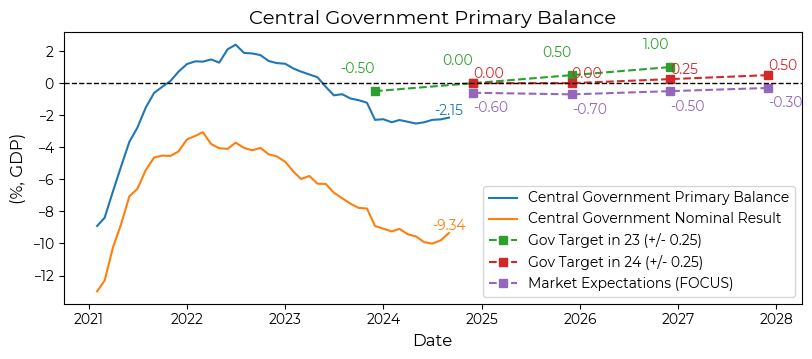

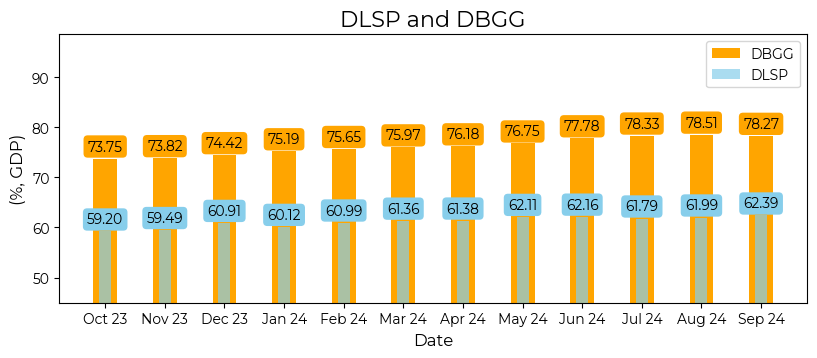

In [33]:
dbggs_df = cutoff_df(dbggs_df, "DateTime")

# Calculate the difference between consecutive rows for DLSP and DBGG
df_diff = dbggs_df[["DLSP", "DBGG"]].diff()

# Add the difference as new columns to the original DataFrame
dbggs_df[["DLSP_diff", "DBGG_diff"]] = df_diff
resultados_df = add_data(resultados_df)

# Charts
primario_chart(resultados_df)
dbggs_chart(dbggs_df)


In [34]:
import csv

data = [
    [None, "DLSP", None, "DBGG", None],
    [None, "R$ bilhões", "p.p. PIB", "R$ bilhões", "p.p. PIB"],
    ["Desvalorização de 1% na taxa de câmbio", -9.8, -0.09, 10.4, 0.09],
    ["Redução de 1 p.p. na taxa Selic", -54.7, -0.48, -49.9, -0.44],
    ["Redução de 1 p.p. nos índices de preços", -17.8, -0.16, -17.6, -0.15],
]

# Save data to CSV
file_name = "../data/processed/elasticidades_DLSP_DBGG.csv"

with open(file_name, mode="w", encoding="utf-8", newline="") as file:
    writer = csv.writer(file, delimiter=",")
    writer.writerows(data)

print(f"CSV file '{file_name}' created successfully!")

CSV file '../data/processed/elasticidades_DLSP_DBGG.csv' created successfully!
